#### Supply Chain Analysis

Redefine the Supply Chain Network for the next 5 years considering the recent increase in shipping costs and the forecasts of future demand.

In [1]:
import pandas as pd
!pip install pulp
from pulp import *
import seaborn as sns
import matplotlib.pyplot as plt

#### Plant Location

Manufacturing variable costs

In [2]:
# Import Costs
manvar_costs = pd.read_excel(r"C:\Users\mani ganesh\Downloads\Supply Chain Optimization\variable_costs.xlsx", index_col = 0)
manvar_costs

,USA,Germany,Japan,Brazil,India
Variable Costs ($/Unit),,,,,
USA,12,12,12,12,12
Germany,13,13,13,13,13
Japan,10,10,10,10,10
Brazil,8,8,8,8,8
India,5,5,5,5,5


<Axes: title={'center': 'Manufacturing variable costs'}, xlabel='Variable Costs ($/Unit)'>

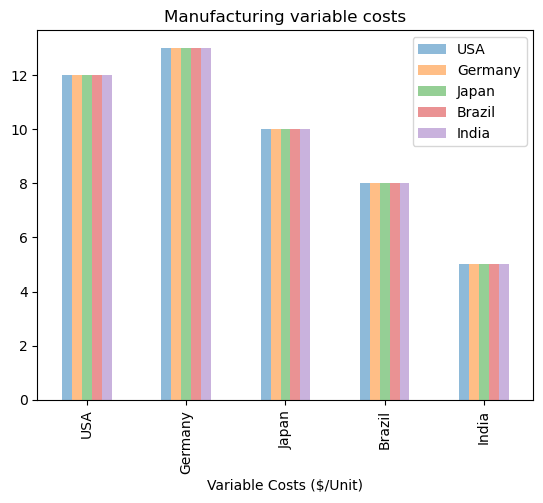

In [3]:
manvar_costs.plot(kind="bar", title="Manufacturing variable costs", alpha = 0.5)

India has the lowest manufacturing variable cost per unit, while Germany and the USA have relatively higher manufacturing variable costs compared to the other countries.

#### Freight Costs

In [4]:
# Import Costs
freight_costs = pd.read_excel(r"C:\Users\mani ganesh\Downloads\Supply Chain Optimization\freight_costs.xlsx", index_col = 0)
freight_costs

,USA,Germany,Japan,Brazil,India
Freight Costs ($/Container),,,,,
USA,0,12250,1100,16100,8778
Germany,13335,0,8617,20244,10073
Japan,15400,22750,0,43610,14350
Brazil,16450,22050,28000,0,29750
India,13650,15400,24500,29400,0


<Axes: title={'center': 'Freight costs'}, xlabel='Freight Costs ($/Container)'>

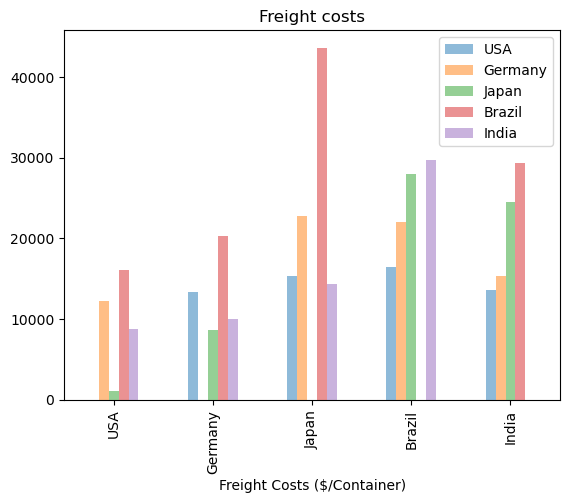

In [30]:
freight_costs.plot(kind="bar", title="Freight costs", alpha = 0.5)

Shipping containers from Japan to the USA incurs a cost of $15,400 per container, significantly higher than the cost of $1,100 when transporting containers from the USA to Japan.

Additionally, the cost of shipping containers from Japan to Brazil is the highest among all routes, amounting to $43,610 per container.

These cost disparities highlight varying transportation expenses based on the shipping routes between different countries within the supply chain network.

#### Variable Costs

This combined data provides insights into both manufacturing variable costs and transportation expenses incurred between various countries within the supply chain network, demonstrating the diverse costs associated with both production and logistics across different routes.

In [6]:
# Variable Costs
var_cost = freight_costs/1000 + manvar_costs 
var_cost

,USA,Germany,Japan,Brazil,India
Freight Costs ($/Container),,,,,
USA,12.000,24.25,13.100,28.100,20.778
Germany,26.335,13.00,21.617,33.244,23.073
Japan,25.400,32.75,10.000,53.610,24.350
Brazil,24.450,30.05,36.000,8.000,37.750
India,18.650,20.40,29.500,34.400,5.000


<Axes: title={'center': 'Bar Graph for Variable Cost'}, xlabel='Freight Costs ($/Container)'>

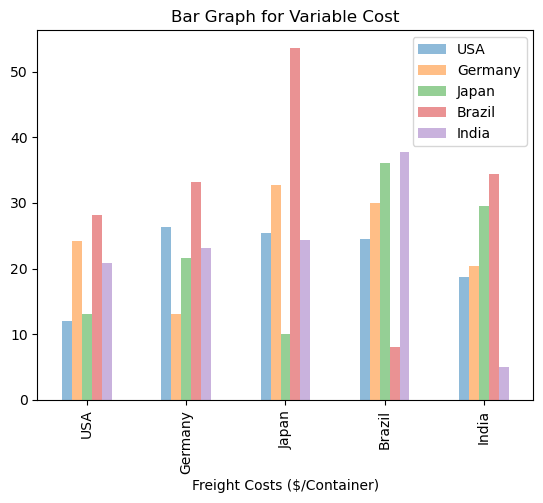

In [7]:
var_cost.plot(kind="bar", title="Bar Graph for Variable Cost", alpha = 0.5)

#### Fixed Costs

These ranges depict the variability in fixed costs among different countries, showcasing the potential range within which fixed expenses might fall for each specific country in the supply chain network.

In [8]:
# Import Costs
fixed_costs = pd.read_excel(r"C:\Users\mani ganesh\Downloads\Supply Chain Optimization\fixed_cost.xlsx", index_col = 0)
fixed_costs

,Low,High
USA,6500,9500
Germany,4980,7270
Japan,6230,9100
Brazil,3230,4730
India,2110,6160


Text(0, 0.5, 'Fixed costs')

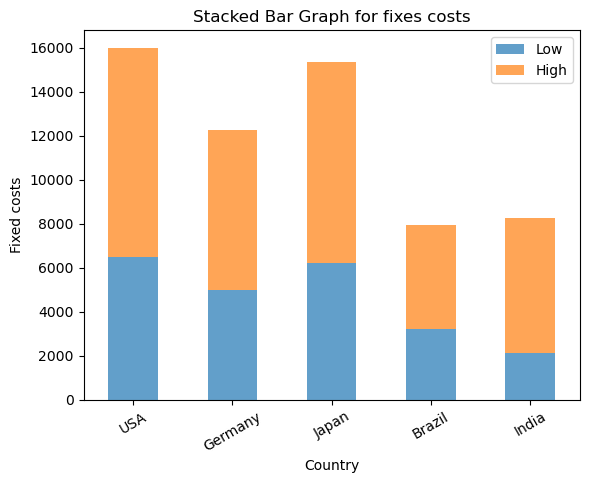

In [9]:
# Create the stacked bar graph
alpha = 0.7
fixed_costs.plot(kind="bar", stacked=True, title="Stacked Bar Graph for fixes costs", alpha = alpha)
plt.xticks(rotation=30)
plt.xlabel("Country")
plt.ylabel("Fixed costs")

#### Plants Capacity

These ranges depict the potential production capacity limits for each country within the supply chain network, showing the variability in the monthly production capabilities across different regions.

In [10]:
# Two types of plants: Low Capacity and High Capacity Plant
cap = pd.read_excel(r"C:\Users\mani ganesh\Downloads\Supply Chain Optimization\capacity.xlsx", index_col = 0)
cap

,Low,High
Capacity (kUnits/month),,
USA,500,1500
Germany,500,1500
Japan,500,1500
Brazil,500,1500
India,500,3000


Text(0, 0.5, 'Capacity (kUnits/month)')

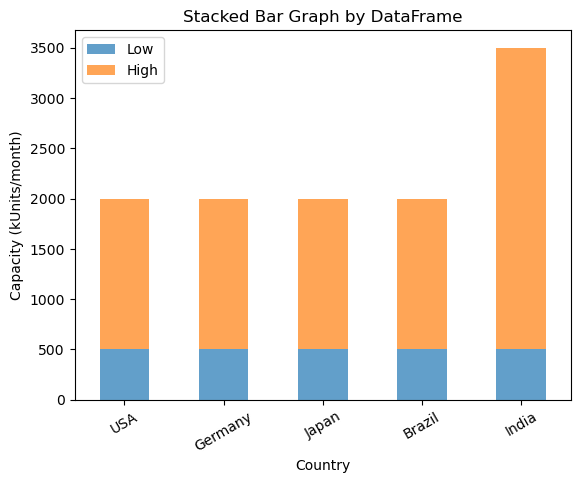

In [11]:
# Create the stacked bar graph
alpha = 0.7
cap.plot(kind="bar", stacked=True, title="Stacked Bar Graph by DataFrame", alpha = alpha)
plt.xticks(rotation=30)
plt.xlabel("Country")
plt.ylabel("Capacity (kUnits/month)")

#### Demand

These figures represent the quantity of units required per month in each country, indicating the demand levels that need to be fulfilled by the supply chain to meet the market requirements in each region.

In [12]:
#Demand
demand = pd.read_excel(r"C:\Users\mani ganesh\Downloads\Supply Chain Optimization\demand.xlsx", index_col = 0)
demand

,Unnamed: 1,Unnamed: 2
NaN,(Units/month),Demand
NaN,USA,2800000
NaN,Germany,90000
NaN,Japan,1700000
NaN,Brazil,145000
NaN,India,160000


In [13]:
demand.rename(columns={"Unnamed: 1": "(Units/month)", "Unnamed: 2": "Demand"}, inplace=True)
demand = demand.tail(-1)
demand = demand.reset_index(drop=True)
demand.set_index('(Units/month)', inplace=True)
demand

,Demand
(Units/month),
USA,2800000
Germany,90000
Japan,1700000
Brazil,145000
India,160000


<Axes: ylabel='Demand'>

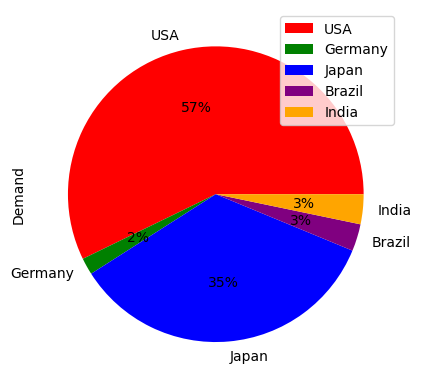

In [14]:
colors = ['red', 'green', 'blue', 'purple', 'orange']
demand.plot( kind='pie',y='Demand', autopct='%1.0f%%', colors=colors) 

US market is driving more than half of the demand.

#### Decision Variables

In [15]:
# Define Decision Variables
loc = ['USA', 'Germany', 'Japan', 'Brazil', 'India']
size = ['Low', 'High']

In [16]:
# Initialize Class
model = LpProblem("Capacitated_Plant_Location_Model", LpMinimize)

In [17]:
# Create Decision Variables
x = LpVariable.dicts("production_", 
                     [(i,j) for i in loc 
                      for j in loc],
                     lowBound=0, upBound=None, cat='continuous') #Variables that can take only real value
x

{('USA', 'USA'): production__('USA',_'USA'),
 ('USA', 'Germany'): production__('USA',_'Germany'),
 ('USA', 'Japan'): production__('USA',_'Japan'),
 ('USA', 'Brazil'): production__('USA',_'Brazil'),
 ('USA', 'India'): production__('USA',_'India'),
 ('Germany', 'USA'): production__('Germany',_'USA'),
 ('Germany', 'Germany'): production__('Germany',_'Germany'),
 ('Germany', 'Japan'): production__('Germany',_'Japan'),
 ('Germany', 'Brazil'): production__('Germany',_'Brazil'),
 ('Germany', 'India'): production__('Germany',_'India'),
 ('Japan', 'USA'): production__('Japan',_'USA'),
 ('Japan', 'Germany'): production__('Japan',_'Germany'),
 ('Japan', 'Japan'): production__('Japan',_'Japan'),
 ('Japan', 'Brazil'): production__('Japan',_'Brazil'),
 ('Japan', 'India'): production__('Japan',_'India'),
 ('Brazil', 'USA'): production__('Brazil',_'USA'),
 ('Brazil', 'Germany'): production__('Brazil',_'Germany'),
 ('Brazil', 'Japan'): production__('Brazil',_'Japan'),
 ('Brazil', 'Brazil'): production_

In [18]:
y = LpVariable.dicts("plant_", 
                     [(i,s) for s in size 
                      for i in loc],
                     cat='Binary') # they can take only two values (0 or 1)
y

{('USA', 'Low'): plant__('USA',_'Low'),
 ('Germany', 'Low'): plant__('Germany',_'Low'),
 ('Japan', 'Low'): plant__('Japan',_'Low'),
 ('Brazil', 'Low'): plant__('Brazil',_'Low'),
 ('India', 'Low'): plant__('India',_'Low'),
 ('USA', 'High'): plant__('USA',_'High'),
 ('Germany', 'High'): plant__('Germany',_'High'),
 ('Japan', 'High'): plant__('Japan',_'High'),
 ('Brazil', 'High'): plant__('Brazil',_'High'),
 ('India', 'High'): plant__('India',_'High')}

In [19]:
# Define Objective Function
model += (lpSum([fixed_costs.loc[i,s] * y[(i,s)] * 1000 for s in size for i in loc])
          + lpSum([var_cost.loc[i,j] * x[(i,j)]   for i in loc for j in loc]))

In [20]:
# Add Constraints
# Constraints 1 Supply meets the demant in market.
for j in loc:
    model += lpSum([x[(i, j)] for i in loc]) == demand.loc[j,'Demand']

# Constraint 2 Maximum production capacity per plant
for i in loc:
    model += lpSum([x[(i, j)] for j in loc]) <= lpSum([cap.loc[i,s]*y[(i,s)] * 1000
                                                       for s in size])

In [21]:
# Solve Model
model.solve()
print("Total Costs = {:,} ($/Month)".format(int(value(model.objective))))
print('\n' + "Status: {}".format(LpStatus[model.status]))

Total Costs = 92,981,000 ($/Month)

Status: Optimal


In [22]:
# Dictionnary
dict_plant = {}
dict_prod = {}
for v in model.variables():
    if 'plant' in v.name:
        name = v.name.replace('plant__', '').replace('_', '')
        dict_plant[name] = int(v.varValue)
        p_name = name
    else:
        name = v.name.replace('production__', '').replace('_', '')
        dict_prod[name] = v.varValue
    print(name, "=", v.varValue)

('Brazil','High') = 0.0
('Brazil','Low') = 1.0
('Germany','High') = 0.0
('Germany','Low') = 0.0
('India','High') = 1.0
('India','Low') = 0.0
('Japan','High') = 1.0
('Japan','Low') = 0.0
('USA','High') = 1.0
('USA','Low') = 0.0
('Brazil','Brazil') = 145000.0
('Brazil','Germany') = 0.0
('Brazil','India') = 0.0
('Brazil','Japan') = 0.0
('Brazil','USA') = 0.0
('Germany','Brazil') = 0.0
('Germany','Germany') = 0.0
('Germany','India') = 0.0
('Germany','Japan') = 0.0
('Germany','USA') = 0.0
('India','Brazil') = 0.0
('India','Germany') = 90000.0
('India','India') = 160000.0
('India','Japan') = 0.0
('India','USA') = 1500000.0
('Japan','Brazil') = 0.0
('Japan','Germany') = 0.0
('Japan','India') = 0.0
('Japan','Japan') = 1500000.0
('Japan','USA') = 0.0
('USA','Brazil') = 0.0
('USA','Germany') = 0.0
('USA','India') = 0.0
('USA','Japan') = 200000.0
('USA','USA') = 1300000.0


In [23]:
# Extract data from dictionaries
plant_data = []
prod_data = []
for name, value in dict_plant.items():
    plant_data.append([name, value])
for name, value in dict_prod.items():
    prod_data.append([name, value])

# Create separate DataFrames
df_plant = pd.DataFrame(plant_data, columns=["Plant", "Production"])
df_prod = pd.DataFrame(prod_data, columns=["Product", "Production"])

df_plant

,Plant,Production
0,"('Brazil','High')",0
1,"('Brazil','Low')",1
2,"('Germany','High')",0
3,"('Germany','Low')",0
4,"('India','High')",1
5,"('India','Low')",0
6,"('Japan','High')",1
7,"('Japan','Low')",0
8,"('USA','High')",1
9,"('USA','Low')",0


In [31]:
# Capacity Plant
list_low, list_high = [], []
for l in loc:
    for cap in ['Low', 'High']:
        x = "('{}','{}')".format(l, cap)
        if cap == 'Low':
            list_low.append(dict_plant[x])
        else:
            list_high.append(dict_plant[x])
df_capacity = pd.DataFrame({'Location': loc, 'Low': list_low, 'High': list_high}).set_index('Location')
    
df_capacity

,Low,High
Location,,
USA,0,1
Germany,0,0
Japan,0,1
Brazil,1,0
India,0,1


Based on the given data:
- USA plant is in a high-production state.
- Germany plant is not in production (zero production).
- Japan plant is in a high-production state.
- Brazil plant is in a low-production state.
- India plant is in a high-production state.

These values likely represent the optimized allocation or utilization of plants in a specific scenario, based on the constraints and objectives defined within the linear programming or optimization model implemented using PuLP.